In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
booking_data=pd.read_csv('booking.csv')
booking_data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
object_columns=booking_data.select_dtypes(include=['object']).columns
object_columns = [col for col in object_columns if col not in ["Booking_ID","date of reservation"]]
print(object_columns)

['type of meal', 'room type', 'market segment type', 'booking status']


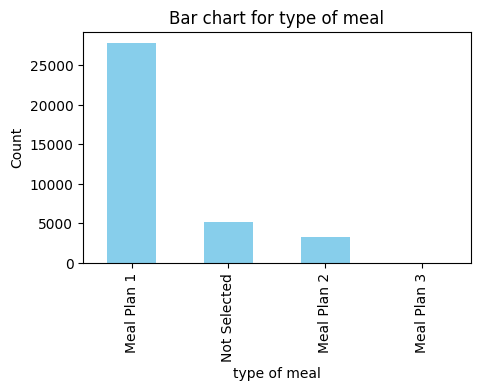

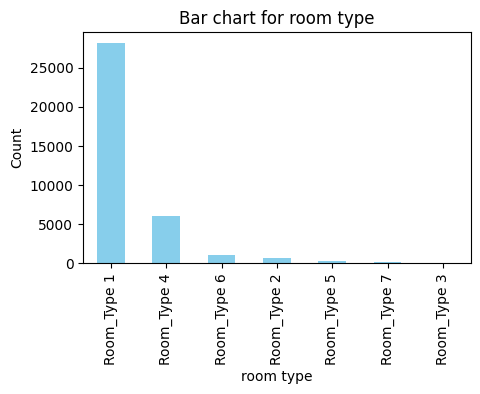

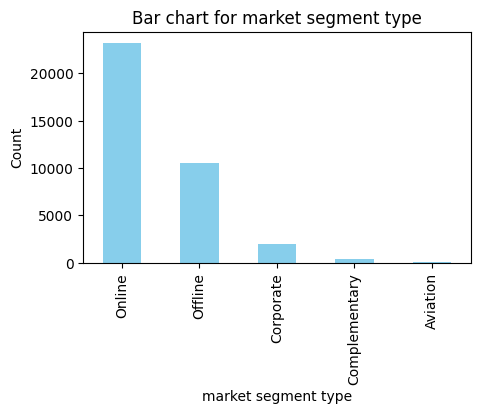

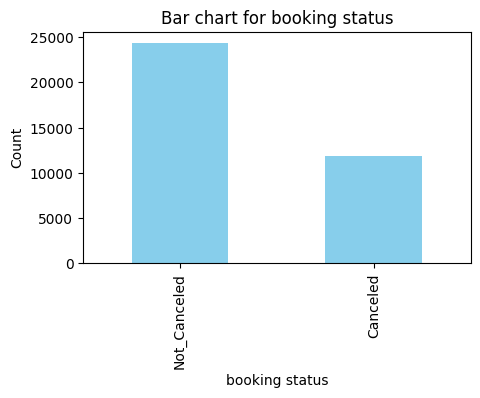

In [6]:
for column in object_columns:
    plt.figure(figsize=(5,3))
    booking_data[column].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'Bar chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<Figure size 500x300 with 0 Axes>

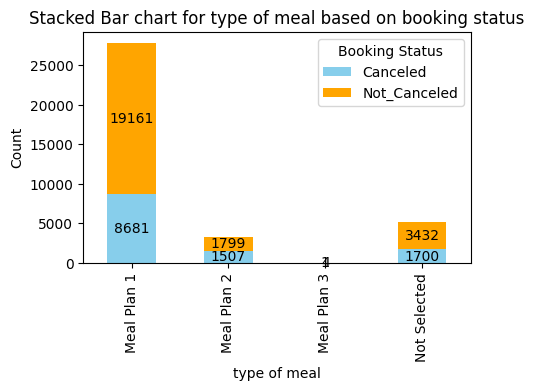

<Figure size 500x300 with 0 Axes>

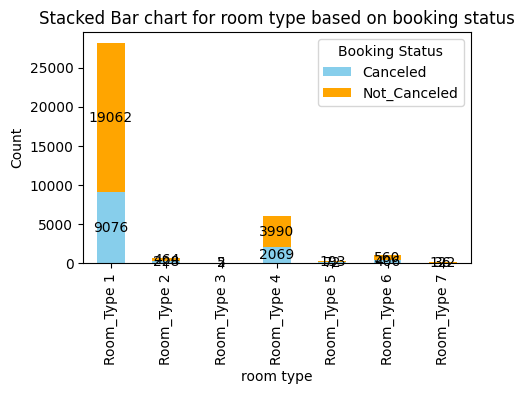

<Figure size 500x300 with 0 Axes>

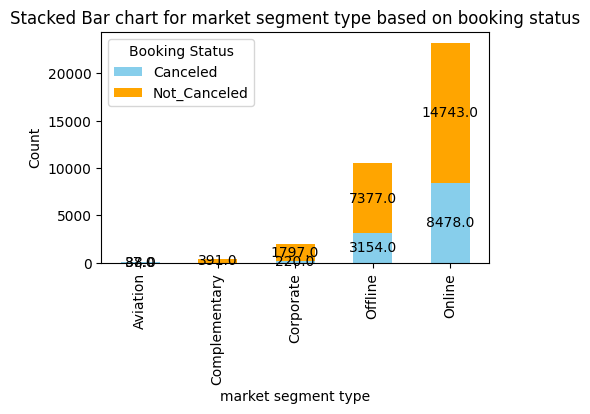

<Figure size 500x300 with 0 Axes>

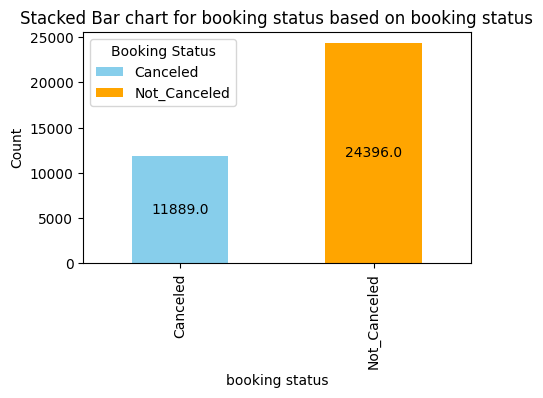

In [7]:
for column in object_columns:
    plt.figure(figsize=(5,3))
    stacked_data=booking_data.groupby([column,'booking status']).size().unstack()
    stacked_data.plot(kind='bar',stacked=True,color=['skyblue','orange'],figsize=(5,3))

    #Adding data labels 
    for p in stacked_data.columns:
        for i,value in enumerate(stacked_data[p]):
            if not pd.isna(value):
                plt.text(i,stacked_data.iloc[:,:].loc[:,:p].sum(axis=1).iloc[i]-value/2,
                         f'{value}',ha='center',va='center',color='black')

    plt.title(f'Stacked Bar chart for {column} based on booking status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Booking Status')
    plt.show()

In [18]:
numerical_columns=booking_data.select_dtypes(include=['int64','float64']).columns

print(numerical_columns)

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price', 'special requests'],
      dtype='object')


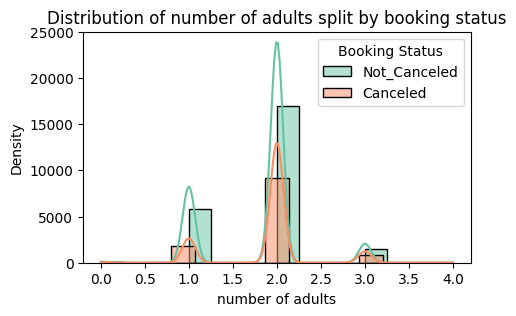

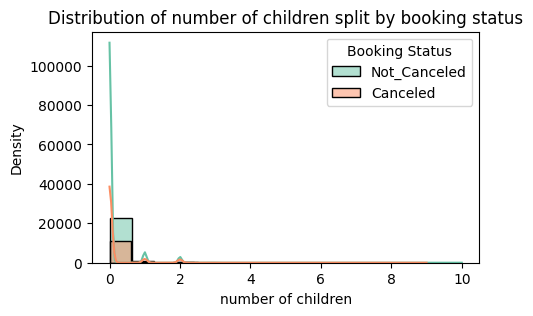

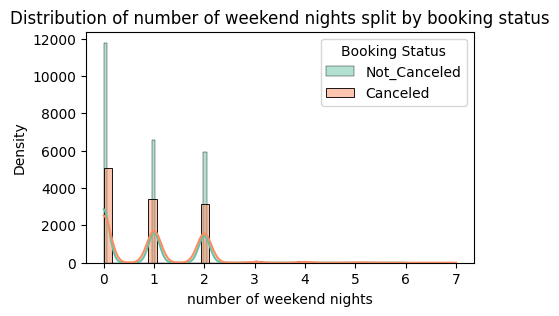

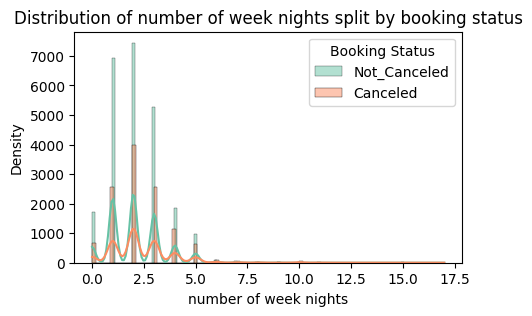

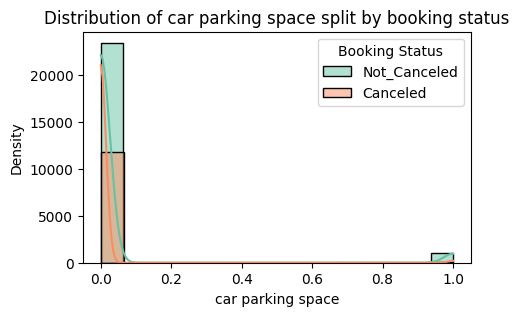

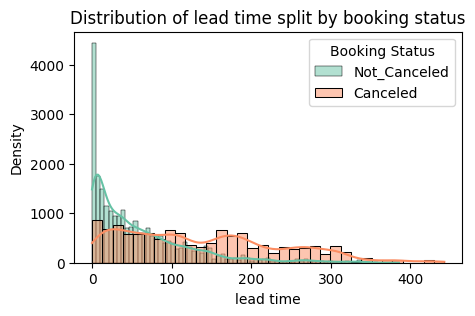

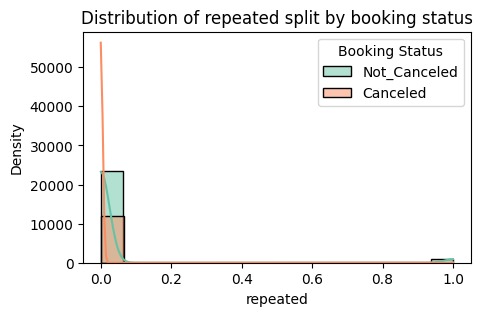

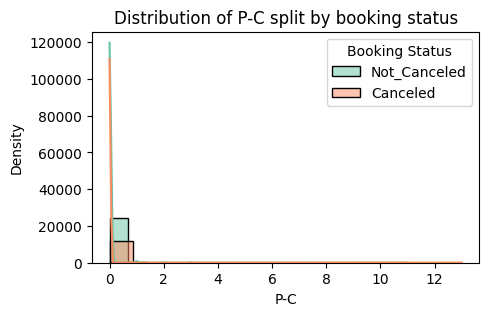

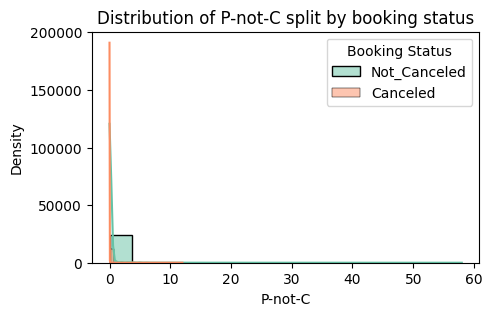

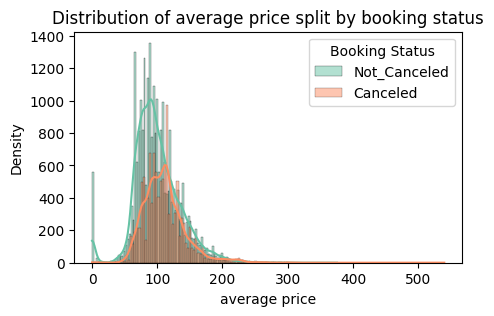

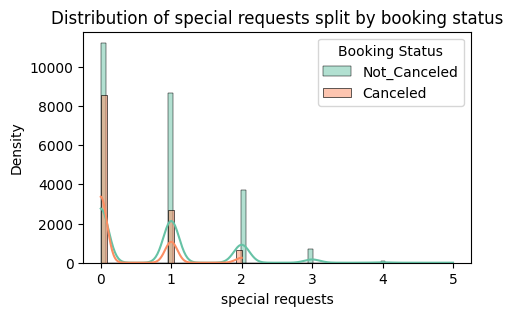

In [15]:
for column in numerical_columns:
    plt.figure(figsize=(5, 3)) 

    # Get unique values in the "booking status" column
    booking_statuses = booking_data['booking status'].unique()

    # Plot each group separately
    for status in booking_statuses:
        subset = booking_data[booking_data['booking status'] == status]
        sns.histplot(data=subset, x=column, kde=True, label=status, color=sns.color_palette('Set2')[booking_statuses.tolist().index(status)])

    plt.title(f'Distribution of {column} split by booking status')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(title='Booking Status')
    plt.show()


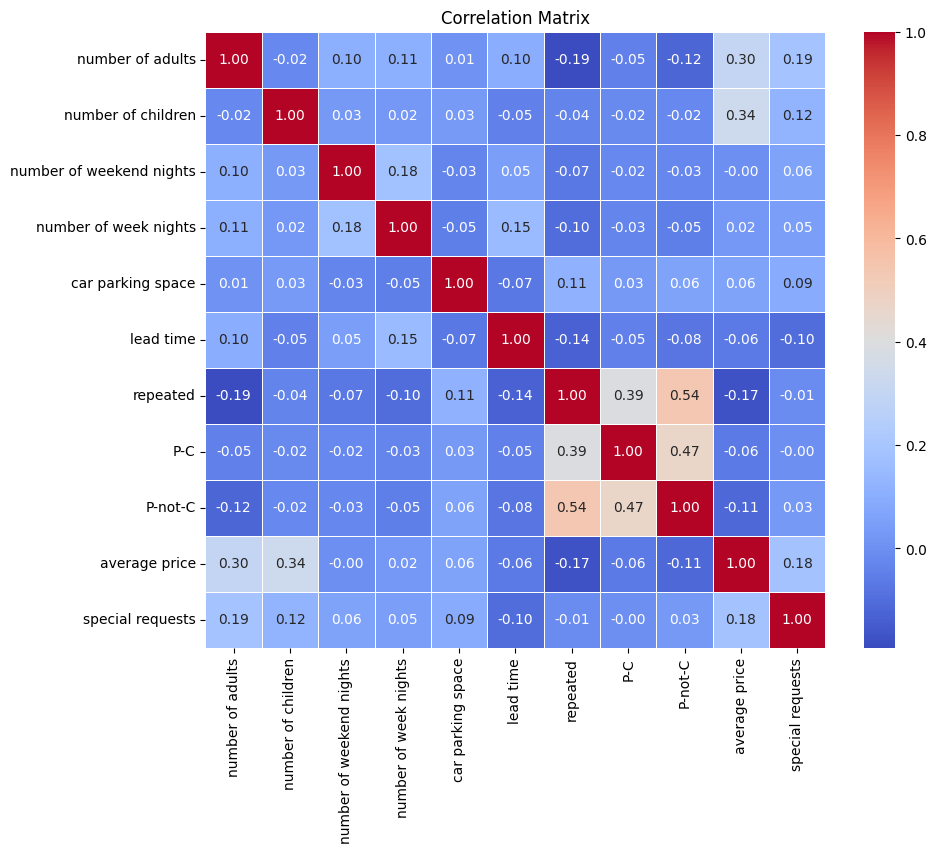

In [21]:
numerical_data=booking_data[numerical_columns]
correlation_data=numerical_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_data,annot=True,cmap='coolwarm',fmt='.2f',
            linewidth=.5)
plt.title('Correlation Matrix')
plt.show()